In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [2]:
print(os.environ["LD_LIBRARY_PATH"])

/usr/local/cuda-11.5/lib64:/usr/local/cudnn/lib


In [3]:

import zipfile
import random
import tensorflow as tf
import keras 
from keras.optimizer_v2 import (
    adadelta,
    adagrad,
    adamax,
    adam,
    learning_rate_schedule,
    gradient_descent,
    ftrl,
    )
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2, l1_l2
from keras.constraints import MaxNorm
from keras.callbacks import Callback, EarlyStopping, LearningRateScheduler

import random
import sys 

print(tf.__version__)
print(sys.version)

2.8.0
3.10.4 (main, Mar 25 2022, 00:00:00) [GCC 11.2.1 20220127 (Red Hat 11.2.1-9)]


In [4]:
from keras.models import Model

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import inspect 
import time 
import datetime
import cv2

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.image as mpimg
from PIL import Image
from PIL import ImageFilter

In [6]:
import pandas as pd 

In [7]:
DATA_PATH = './OCT2017/all_data'

In [8]:
data_listing = os.listdir(DATA_PATH)

In [9]:
print(data_listing)

['NORMAL', 'CNV', 'DME', 'DRUSEN']


In [10]:
train_dir= DATA_PATH
CNV_PATH = os.path.join(train_dir, 'CNV')
DME_PATH = os.path.join(train_dir, 'DME')
NORMAL_PATH = os.path.join(train_dir, 'NORMAL')
DRUSEN_PATH = os.path.join(train_dir, 'DRUSEN')

In [11]:
cnv = os.listdir(CNV_PATH)
dme = os.listdir(DME_PATH)
normal = os.listdir(NORMAL_PATH)
drusen = os.listdir(DRUSEN_PATH)

In [12]:
print(len(cnv))
print(len(dme))
print(len(normal))
print(len(drusen))

37205
11348
26315
8616


In [13]:
def plot_grid(path_prefix, images_list, ncols=4, nrows=4, grey=False):
    import os
    example_test_images = random.sample(images_list, ncols*nrows)
    fig = plt.gcf()
    fig.set_size_inches(15, 15)

    for i, img_path in enumerate(example_test_images):
                   
        sp = plt.subplot(nrows, ncols, i+1)
        sp.axis('Off')
        img = mpimg.imread(os.path.join(path_prefix, img_path))
        if grey:
            plt.imshow(img, cmap=plt.get_cmap('gray'))
        else:
            plt.imshow(img)
    plt.show()

In [14]:
# plot_grid(CNV_PATH, cnv)

In [15]:
# plot_grid(DME_PATH, dme)

In [16]:
#plot_grid(NORMAL_PATH, normal)

In [17]:
# plot_grid(DRUSEN_PATH, drusen,1, 1)

In [18]:
def train_nn_model(optimizer):


    # regu = tf.keras.regularizers.l2(1e-4)
    regu = tf.keras.regularizers.l1_l2(5e-8, 5e-8)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(256, 256, 3)),
        tf.keras.layers.Conv2D(32, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),    
        tf.keras.layers.Conv2D(32, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu), 
        # tf.keras.layers.Conv2D(32,(3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        # tf.keras.layers.Conv2D(32,(3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),
        # tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='leaky_relu', input_shape=(96, 96, 3)),  
        # tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),
        # tf.keras.layers.MaxPooling2D(2,2),
        
  
        #tf.keras.layers.Conv2D(64 , (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),
        tf.keras.layers.MaxPooling2D(2,2), 
        # tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        # tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        # tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        tf.keras.layers.MaxPooling2D(2,2), 
        
        tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),    
        tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),
        tf.keras.layers.MaxPooling2D(2,2, padding='same'),
        # tf.keras.layers.BatchNormalization(),
        
        # tf.keras.layers.Conv2D(256, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),     
        # tf.keras.layers.Conv2D(32, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        # tf.keras.layers.Conv2D(32 , (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),
        tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),
        tf.keras.layers.MaxPooling2D((2,2), padding='same'), 
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        tf.keras.layers.Conv2D(256, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),
        # tf.keras.layers.MaxPooling2D((2,2), padding='same'), 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regu),
        # tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=regu),
        tf.keras.layers.Dense(4, activation='softmax')])
        
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
    print(model)
 
    # model fitting
    return model

In [19]:
epochs=40
batch_size=4

train_datagen = ImageDataGenerator(rescale=1./255., data_format="channels_last", 
                                   validation_split=0.20,
                                   horizontal_flip=True,
                                   rotation_range=37,
                                   vertical_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    # target_size=(256, 256),
                                                    batch_size=batch_size,
                                                    subset='training',
                                                    class_mode='binary',
                                                    color_mode='rgb')


valid_generator = train_datagen.flow_from_directory(train_dir,
                                                    # target_size=(96, 96), 
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    subset='validation',
                                                    class_mode='binary',
                                                    color_mode='rgb')


steps=len(train_generator.filenames)//batch_size 

best_path='./best_val_acc_'+str(int(time.time()))
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=best_path,
    monitor='val_acc',
    mode='max',
    save_best_only=True,
    save_weights_only=True,
    initial_value_threshold=0.92)
               
       

def _lrs(epoch, lr):
    return lr
    
lrs = LearningRateScheduler(_lrs) 
 
stop = EarlyStopping(
        monitor='val_acc',
        min_delta=0.0001,
        patience=10,
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=True
)

stop_acc = EarlyStopping(
            monitor='acc',
            min_delta=0.001,
            patience=10,
            verbose=1,
            mode='auto',
            baseline=None,
            restore_best_weights=True)

logdir='./logs'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.


In [20]:
from keras.applications.resnet_v2 import ResNet101V2
from keras.applications.densenet import DenseNet121
from keras.layers import Input, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, UpSampling2D, 
                          concatenate, GlobalAveragePooling2D, Input)
from keras.regularizers import l2, l1_l2
from keras.constraints import MaxNorm
from keras.models import load_model, Sequential
from keras.preprocessing import image
from keras.applications.resnet_v2 import ResNet50V2, ResNet152V2
from keras.applications.xception import Xception
from keras.models import Model

from keras.callbacks import Callback, EarlyStopping, LearningRateScheduler, ModelCheckpoint, LearningRateScheduler, TensorBoard
import sklearn as sk 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [21]:
def predict(model, file, file_to_class):
    base_dir = 'OCT2017/all_data'
    if 'CNV' in file:
        iclass = 0
    elif 'DME' in file:
        iclass = 1
    elif 'DRUSEN' in file:
        iclass = 2
    elif 'NORMAL' in file: 
        iclass = 3
    else:
        print(f'oops: {file}')
    img = Image.open(os.path.join('./OCT2017/all_data', file))
    # img = img.resize((256, 256, 3))
    np_img = np.array(img.getdata())/255.
    print(np_img.shape)
    # t = model.predict(np_img)

               

In [22]:
resnet101V2 = ResNet101V2(include_top=False, weights='imagenet', # input_tensor=Input(shape=(256, 256)), 
                          input_shape=(256, 256, 3), classes=4, classifier_activation='sofmax')

2022-05-17 06:03:18.226440: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 06:03:18.266236: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 06:03:18.266362: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 06:03:18.267279: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [23]:
print(resnet101V2.layers[-1].name)

post_relu


In [24]:
res101V2_out = GlobalAveragePooling2D()(resnet101V2.layers[-1].output)
res101V2_out = Dense(512, activation='leaky_relu')(res101V2_out)
res101V2_out = Dense(128, activation='leaky_relu')(res101V2_out)
pred_res101V2 = Dense(4, activation='softmax')(res101V2_out) 

In [25]:
print(pred_res101V2)

KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='dense_2/Softmax:0', description="created by layer 'dense_2'")


In [26]:
res101_model = Model(inputs=resnet101V2.input, outputs=pred_res101V2) # resnet50v2.input
res101_model.compile(optimizer=keras.optimizers.adam_v2.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['acc'])
# res101_model.summary()


In [27]:
valid_generator.class_indices

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

In [28]:
len(valid_generator.classes)


16696

In [29]:
for l in res101_model.layers:
    train = False
    if l.name == 'conv4_block1_preact_bn':
        train = True
        l.trainable = True
    elif train:
        l.trainable = True
    else:
        l.trainable = False

In [30]:
print(steps)
print(epochs)
print(batch_size)
# res101_model.summary()

16697
40
4


In [31]:
history = res101_model.fit(train_generator, 
                           steps_per_epoch=steps,
                           epochs=epochs,
                           verbose=1,
                           validation_data=valid_generator,
                           callbacks=[tensorboard_callback, model_checkpoint_callback])

Epoch 1/40


2022-05-17 06:03:27.345646: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302
2022-05-17 06:03:28.900798: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


16697/16697 [==============================] - 1719s 103ms/step - loss: 0.2870 - acc: 0.9017 - val_loss: 0.1908 - val_acc: 0.9397
Epoch 2/40
16697/16697 [==============================] - 1414s 85ms/step - loss: 0.1724 - acc: 0.9413 - val_loss: 0.1493 - val_acc: 0.9519
Epoch 3/40
16697/16697 [==============================] - 1421s 85ms/step - loss: 0.1474 - acc: 0.9495 - val_loss: 0.1522 - val_acc: 0.9508
Epoch 4/40
16697/16697 [==============================] - 1423s 85ms/step - loss: 0.1329 - acc: 0.9546 - val_loss: 0.1502 - val_acc: 0.9516
Epoch 5/40
16697/16697 [==============================] - 1424s 85ms/step - loss: 0.1212 - acc: 0.9590 - val_loss: 0.1433 - val_acc: 0.9533
Epoch 6/40
16697/16697 [==============================] - 1425s 85ms/step - loss: 0.1162 - acc: 0.9606 - val_loss: 0.1574 - val_acc: 0.9505
Epoch 7/40
16697/16697 [==============================] - 1427s 85ms/step - loss: 0.1078 - acc: 0.9632 - val_loss: 0.1713 - val_acc: 0.9481
Epoch 8/40
16697/16697 [======

In [32]:
for i, l in enumerate(res101_model.layers):
    print(i, l.name, l.trainable)
    break

0 input_1 False


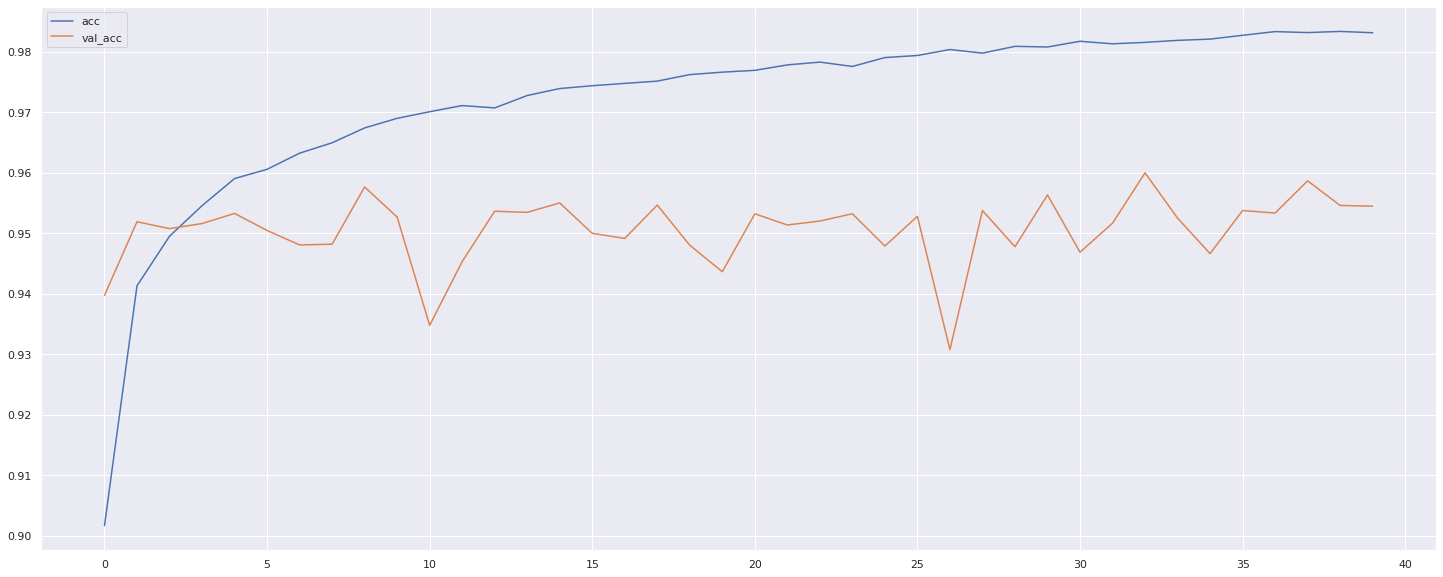

In [33]:
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()

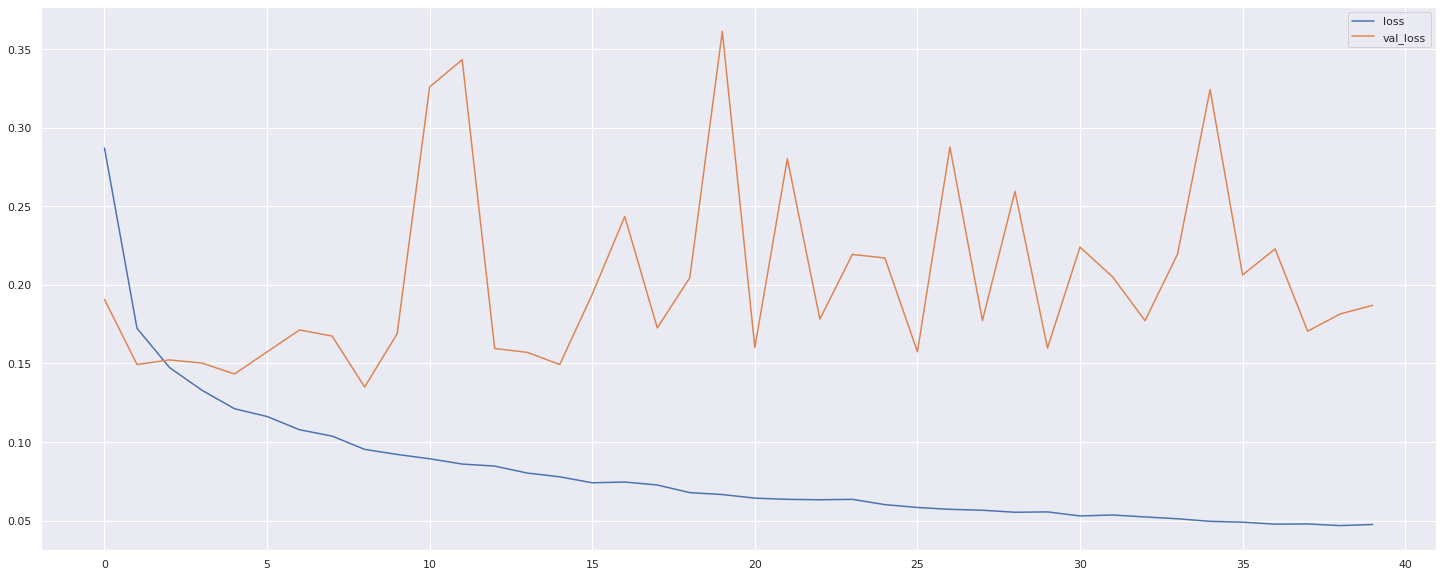

In [34]:
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [35]:
# best_res101 = tf.saved_model.load(best_path)

In [36]:
y_pred = res101_model.predict(valid_generator)

In [38]:
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = valid_generator.classes
print(y_pred_bool[:10])
print(y_test[:10])

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


In [39]:
confusion_matrix(y_test, y_pred_bool)

array([[7188,   60,  162,   31],
       [  36, 2051,    7,  175],
       [  99,   15, 1462,  147],
       [   5,   18,   51, 5189]])

In [40]:
accuracy_score(y_test, y_pred_bool)

0.9517249640632487

In [41]:
print(classification_report(y_test, np.squeeze(y_pred_bool), target_names=list(valid_generator.class_indices.keys())))

              precision    recall  f1-score   support

         CNV       0.98      0.97      0.97      7441
         DME       0.96      0.90      0.93      2269
      DRUSEN       0.87      0.85      0.86      1723
      NORMAL       0.94      0.99      0.96      5263

    accuracy                           0.95     16696
   macro avg       0.94      0.93      0.93     16696
weighted avg       0.95      0.95      0.95     16696



<AxesSubplot:>

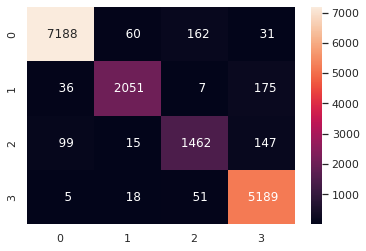

In [44]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_bool), annot=True, fmt='5d')

In [45]:
tf.saved_model.save(res101_model, "./res101_full")

2022-05-17 21:57:39.926547: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./res101_full/assets


In [47]:
loaded = tf.saved_model.load("./res101_full")
converter = tf.lite.TFLiteConverter.from_saved_model("./res101_full")

In [48]:
tflite_full_path = "./tflite_res101_full"
with open(tflite_full_path, "wb") as f:
    f.write(converter.convert())

2022-05-17 21:58:22.950081: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-05-17 21:58:22.950109: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-05-17 21:58:22.950563: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: ./res101_full
2022-05-17 21:58:22.979962: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-05-17 21:58:22.979977: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: ./res101_full
2022-05-17 21:58:23.095564: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-05-17 21:58:24.216915: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: ./res101_full
2022-05-17 21:58:24.537025: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status: success: OK. Took 1586463 microsec

In [49]:
with open(tflite_full_path, "rb") as f:
    tflite_res101_full = f.read()

In [51]:
interpreter_res101_full = tf.lite.Interpreter(model_content=tflite_res101_full)
interpreter_res101_full.allocate_tensors()
input_index = interpreter_res101_full.get_input_details()[0]["index"]
output_index = interpreter_res101_full.get_output_details()[0]["index"]


In [52]:
res101_model.load_weights(best_path)

In [53]:
y_pred = res101_model.predict(valid_generator)

In [54]:
y_pred_bool = np.argmax(y_pred, axis=1)

In [55]:
confusion_matrix(y_test, y_pred_bool)

array([[7218,   73,  138,   12],
       [  29, 2138,    5,   97],
       [  92,   10, 1503,  118],
       [   8,   30,   49, 5176]])

In [56]:
accuracy_score(y_test, y_pred_bool)

0.9604096789650216

In [57]:
print(classification_report(y_test, np.squeeze(y_pred_bool), target_names=list(valid_generator.class_indices.keys())))

              precision    recall  f1-score   support

         CNV       0.98      0.97      0.98      7441
         DME       0.95      0.94      0.95      2269
      DRUSEN       0.89      0.87      0.88      1723
      NORMAL       0.96      0.98      0.97      5263

    accuracy                           0.96     16696
   macro avg       0.94      0.94      0.94     16696
weighted avg       0.96      0.96      0.96     16696



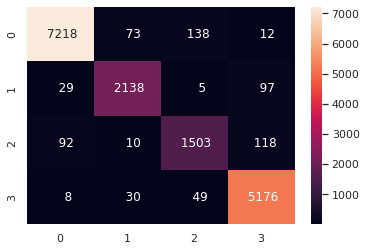

In [65]:
import seaborn as sns
res101_heatmap = sns.heatmap(confusion_matrix(y_test, y_pred_bool), annot=True, fmt='5d')

In [70]:
res101_heatmap.figure.savefig('res101_heatmap.png')

In [59]:
tf.saved_model.save(res101_model, "./res101_best")

INFO:tensorflow:Assets written to: ./res101_best/assets


INFO:tensorflow:Assets written to: ./res101_best/assets


In [61]:
loaded = tf.saved_model.load("./res101_best")
converter = tf.lite.TFLiteConverter.from_saved_model("./res101_best")

In [62]:
tflite_best_path = "./tflite_res101_best"
with open(tflite_best_path, "wb") as f:
    f.write(converter.convert())

2022-05-17 22:03:57.170014: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-05-17 22:03:57.170048: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-05-17 22:03:57.170182: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: ./res101_best
2022-05-17 22:03:57.202523: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-05-17 22:03:57.202539: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: ./res101_best
2022-05-17 22:03:57.324007: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-05-17 22:03:58.475112: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: ./res101_best
2022-05-17 22:03:58.814846: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status: success: OK. Took 1644664 microsec

In [63]:
with open(tflite_full_path, "rb") as f:
    tflite_res101_best = f.read()

In [64]:
interpreter_res101_best = tf.lite.Interpreter(model_content=tflite_res101_best)
interpreter_res101_best.allocate_tensors()
input_index = interpreter_res101_best.get_input_details()[0]["index"]
output_index = interpreter_res101_best.get_output_details()[0]["index"]

In [ ]:
tf.keras.Model.save(res101_model, "./keras_res101")

In [ ]:
loaded_model = Model(inputs=resnet101V2.input, outputs=pred_res101V2) # resnet50v2.input
loaded_model.compile(optimizer=keras.optimizers.adam_v2.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['acc'])


In [ ]:
best_path_dense='./best_val_acc_'+str(int(time.time()))
model_checkpoint_callback_dense = keras.callbacks.ModelCheckpoint(
    filepath=best_path_dense,
    monitor='val_acc',
    mode='max',
    save_best_only=True,
    save_weights_only=True,
    initial_value_threshold=0.92)

In [ ]:
densenet121 = DenseNet121(include_top=False, weights='imagenet', input_tensor=Input(shape=(256, 256, 3)), 
                          input_shape=(256, 256, 3), classes=4) #, classifier_activation='softmax')

In [ ]:
dense121_out = GlobalAveragePooling2D()(densenet121.layers[-1].output)
dense121_out = Dense(512, activation='leaky_relu')(dense121_out)
dense121_out = Dense(128, activation='leaky_relu')(dense121_out)
pred_dense121 = Dense(4, activation='softmax')(dense121_out) 

In [ ]:
dense121_model = Model(inputs=densenet121.input, outputs=pred_dense121) # resnet50v2.input
dense121_model.compile(optimizer=keras.optimizers.adam_v2.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['acc'])
# res101_model.summary()

In [ ]:
for l in dense121_model.layers:
    print(l.name)
    break 

In [ ]:
for i,l in enumerate(dense121_model.layers):
    train = False
    if l.name == 'conv4_block1_0_bn':
        train = True
        l.trainable = True
    elif train:
        l.trainable = True
    else:
        l.trainable = False

In [ ]:
history = dense121_model.fit(train_generator, 
                             steps_per_epoch=steps,
                             epochs=epochs,
                             verbose=1,
                             validation_data=valid_generator,
                             callbacks=[tensorboard_callback, model_checkpoint_callback_dense])

In [ ]:
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()

In [ ]:
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# dense121_model.save('dense121_model'+str(int(time.time())))

In [ ]:
y_pred = dense121_model.predict(valid_generator)

In [ ]:
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = valid_generator.classes
print(y_pred_bool[:10])

In [ ]:
confusion_matrix(y_test, y_pred_bool)

In [ ]:
accuracy_score(y_test, y_pred_bool)

In [ ]:
print(classification_report(y_test, np.squeeze(y_pred_bool), target_names=list(valid_generator.class_indices.keys())))

In [ ]:
dense121_model.load_weights(best_path_dense)

In [ ]:
y_pred = dense121_model.predict(valid_generator)

In [ ]:
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = valid_generator.classes
print(y_pred_bool[:10])

In [ ]:
confusion_matrix(y_test, y_pred_bool)

In [ ]:
accuracy_score(y_test, y_pred_bool)

In [ ]:
print(classification_report(y_test, np.squeeze(y_pred_bool), target_names=list(valid_generator.class_indices.keys())))

In [ ]:
best_path_adam='./best_val_acc_'+str(int(time.time()))
model_checkpoint_callback_adam = keras.callbacks.ModelCheckpoint(
    filepath=best_path_adam,
    monitor='val_acc',
    mode='max',
    save_best_only=True,
    save_weights_only=True,
    initial_value_threshold=0.92)
)               

In [ ]:
adam1 = keras.optimizers.adam_v2.Adam(learning_rate=0.00001) #, clipnorm=1e5)

In [ ]:
adam1_model = train_nn_model(adam1)

In [ ]:
# adam1_model.summary()

In [ ]:
history = adam1_model.fit(train_generator, 
                    steps_per_epoch=steps,
                    epochs=80,
                    verbose=1,
                    validation_data=valid_generator,
                    callbacks=[tensorboard_callback, model_checkpoint_callback_adam])

In [ ]:
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()

In [ ]:
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
valid_generator.classes 
y_pred = adam1_model.predict(valid_generator)       
            

In [ ]:
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = valid_generator.classes
print(y_pred_bool[:10])

In [ ]:
confusion_matrix(y_test, y_pred_bool)

In [ ]:
accuracy_score(y_test, y_pred_bool)

In [ ]:
print(classification_report(y_test, np.squeeze(y_pred_bool), target_names=list(valid_generator.class_indices.keys())))

Test the "best" weights

In [ ]:
adam1_model.load_weights(best_path_adam)


In [ ]:
y_pred = adam1_model.predict(valid_generator) 

In [ ]:


y_pred_bool = np.argmax(y_pred, axis=1)
y_test = valid_generator.classes
print(y_pred_bool[:10])

In [ ]:
#print(classification_report(y_test, y_pred_bool))
confusion_matrix(y_test, y_pred_bool)

In [ ]:
accuracy_score(y_test, y_pred_bool)

In [ ]:
print(classification_report(y_test, np.squeeze(y_pred_bool), target_names=list(valid_generator.class_indices.keys())))